In [2]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from utils import read_grid_labels

In [3]:
os.listdir('./data/data_external/')

['train2020_vis_crop1024',
 'val2020_4d',
 'val_grid_3_3',
 'train2020_4d_crop1024',
 'train_grid_3_3',
 'val2020_vis_crop1024',
 'annotations',
 'val2020_4d_IR_coordinate_system',
 'val2020_4d_crop1024',
 'train2020_4d_IR_coordinate_system',
 'train2020_4d']

In [4]:
labels_path = './data/data_external/annotations/val_grid_3_3.txt'
im_path = './data/data_external/val_grid_3_3'
labels = read_grid_labels(labels_path)

In [28]:
class SheepGridDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, labels_path, image_path, root_dir, transform=None, grid_shape=(3,3)):

        self.labels = read_grid_labels(os.path.join(root_dir,labels_path))
        self.image_path = image_path
        self.root_dir = root_dir
        self.transform = transform
        self.grid_shape = grid_shape

    
    def get_keys(self):
        return list(self.labels.keys())
    
    def get_grid_shape(self):
        return self.grid_shape    
    
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        key = list(self.labels.keys())[i]
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_full_path = os.path.join(self.root_dir,
                                self.image_path, key + '.npy')
        image = np.load(img_full_path)
        label = self.labels[key]
        sample = {'image': image, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [29]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.patches as patches

def show_im_with_grid_labels(im, grid, grid_shape):
    print('show_im_with_grid_labels',im.shape, grid.shape, grid_shape )
    fig,ax = plt.subplots(figsize=(10,10))
    grid_2d = grid.reshape(-1, grid_shape[1])
    grid_w = im.shape[1]/grid_2d.shape[1]
    grid_h = im.shape[0]/grid_2d.shape[0]
    
    ax.imshow(im[:,:,:3])
    
    for x in range(grid_shape[1]):
        for y in range(grid_shape[0]):
            if grid_2d[y,x] > 0:
                rect = patches.Rectangle((x*grid_w,y*grid_h),grid_w,grid_h,linewidth=4,edgecolor='green',facecolor='green', alpha=0.1)      
            else:
                rect = patches.Rectangle((x*grid_w,y*grid_h),grid_w,grid_h,linewidth=2,edgecolor='white',facecolor='none')      
            ax.add_patch(rect)
    plt.draw()
    plt.show()


show_im_with_grid_labels (2400, 2400, 4) (9,) (3, 3)


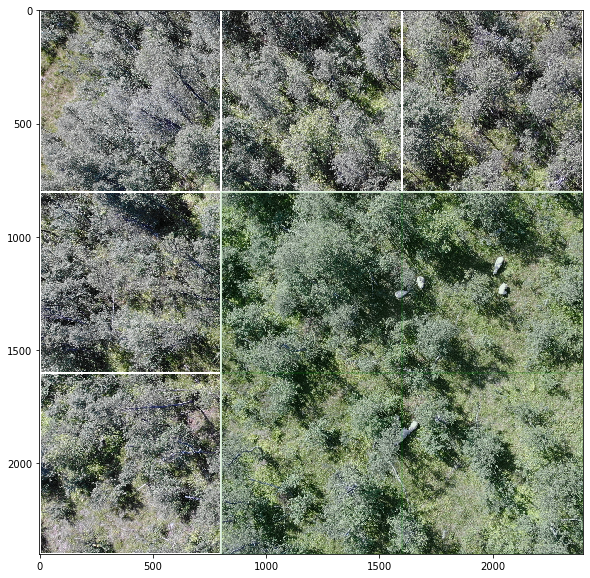

0 (2400, 2400, 4) (9,)
show_im_with_grid_labels (2400, 2400, 4) (9,) (3, 3)


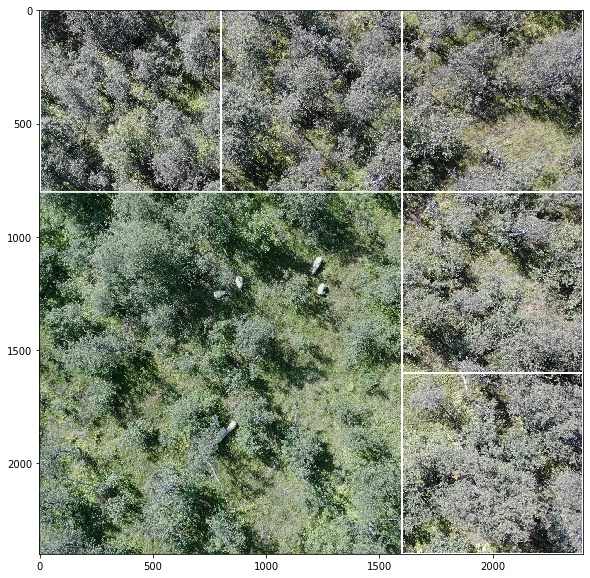

1 (2400, 2400, 4) (9,)
show_im_with_grid_labels (2400, 2400, 4) (9,) (3, 3)


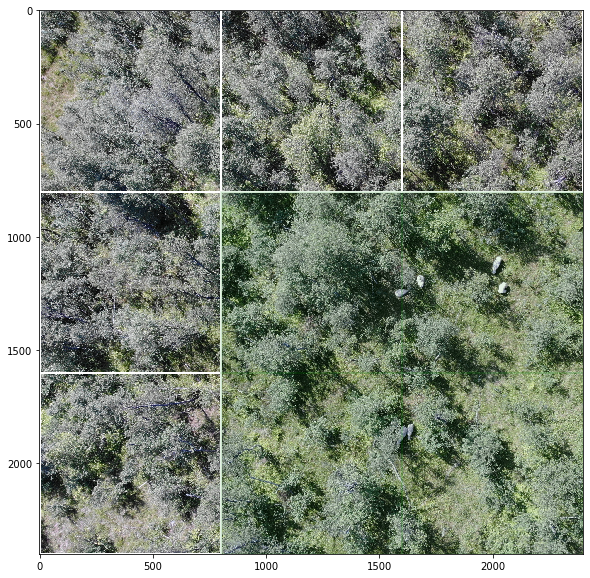

2 (2400, 2400, 4) (9,)


In [32]:
sheep_dataset = SheepGridDataset(labels_path ='annotations/val_grid_3_3.txt',
                                 image_path ='val_grid_3_3',
                                 root_dir = './data/data_external/'
                                )

for i in range(3):
    sample = sheep_dataset[i]
    show_im_with_grid_labels(sample['image'], sample['label'], sheep_dataset.get_grid_shape())

    print(i, sample['image'].shape, sample['label'].shape)
    



In [33]:
sheep_dataset.get_grid_shape()


(3, 3)

In [41]:
dataloader = DataLoader(sheep_dataset, batch_size=4,
                        shuffle=True, num_workers=4)

In [49]:
sample = dataloader.batch_sampler
print(sample)